In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset


In [25]:
data = pd.read_csv('PCOS_data.csv')


# Display the first few rows of the dataset


In [13]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3           15                78                22  ...             0   
1  24.9           15                74                20  ...             0   
2  25.3           11                72                18  ...             1   
3  29.7           13                72                20  ...             0   
4  20.1           11                72                18  ...             0   

   Fast

# Display summary statistics


In [14]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.307579    13.802218         73.247689   
std       6.033545    4.055129     1.840812          4.430285   
min     137.000000   12.400000    

# Check for missing values


In [15]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)    

# Print all column names


In [20]:
print(data.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# Plot histograms for some of the key variables


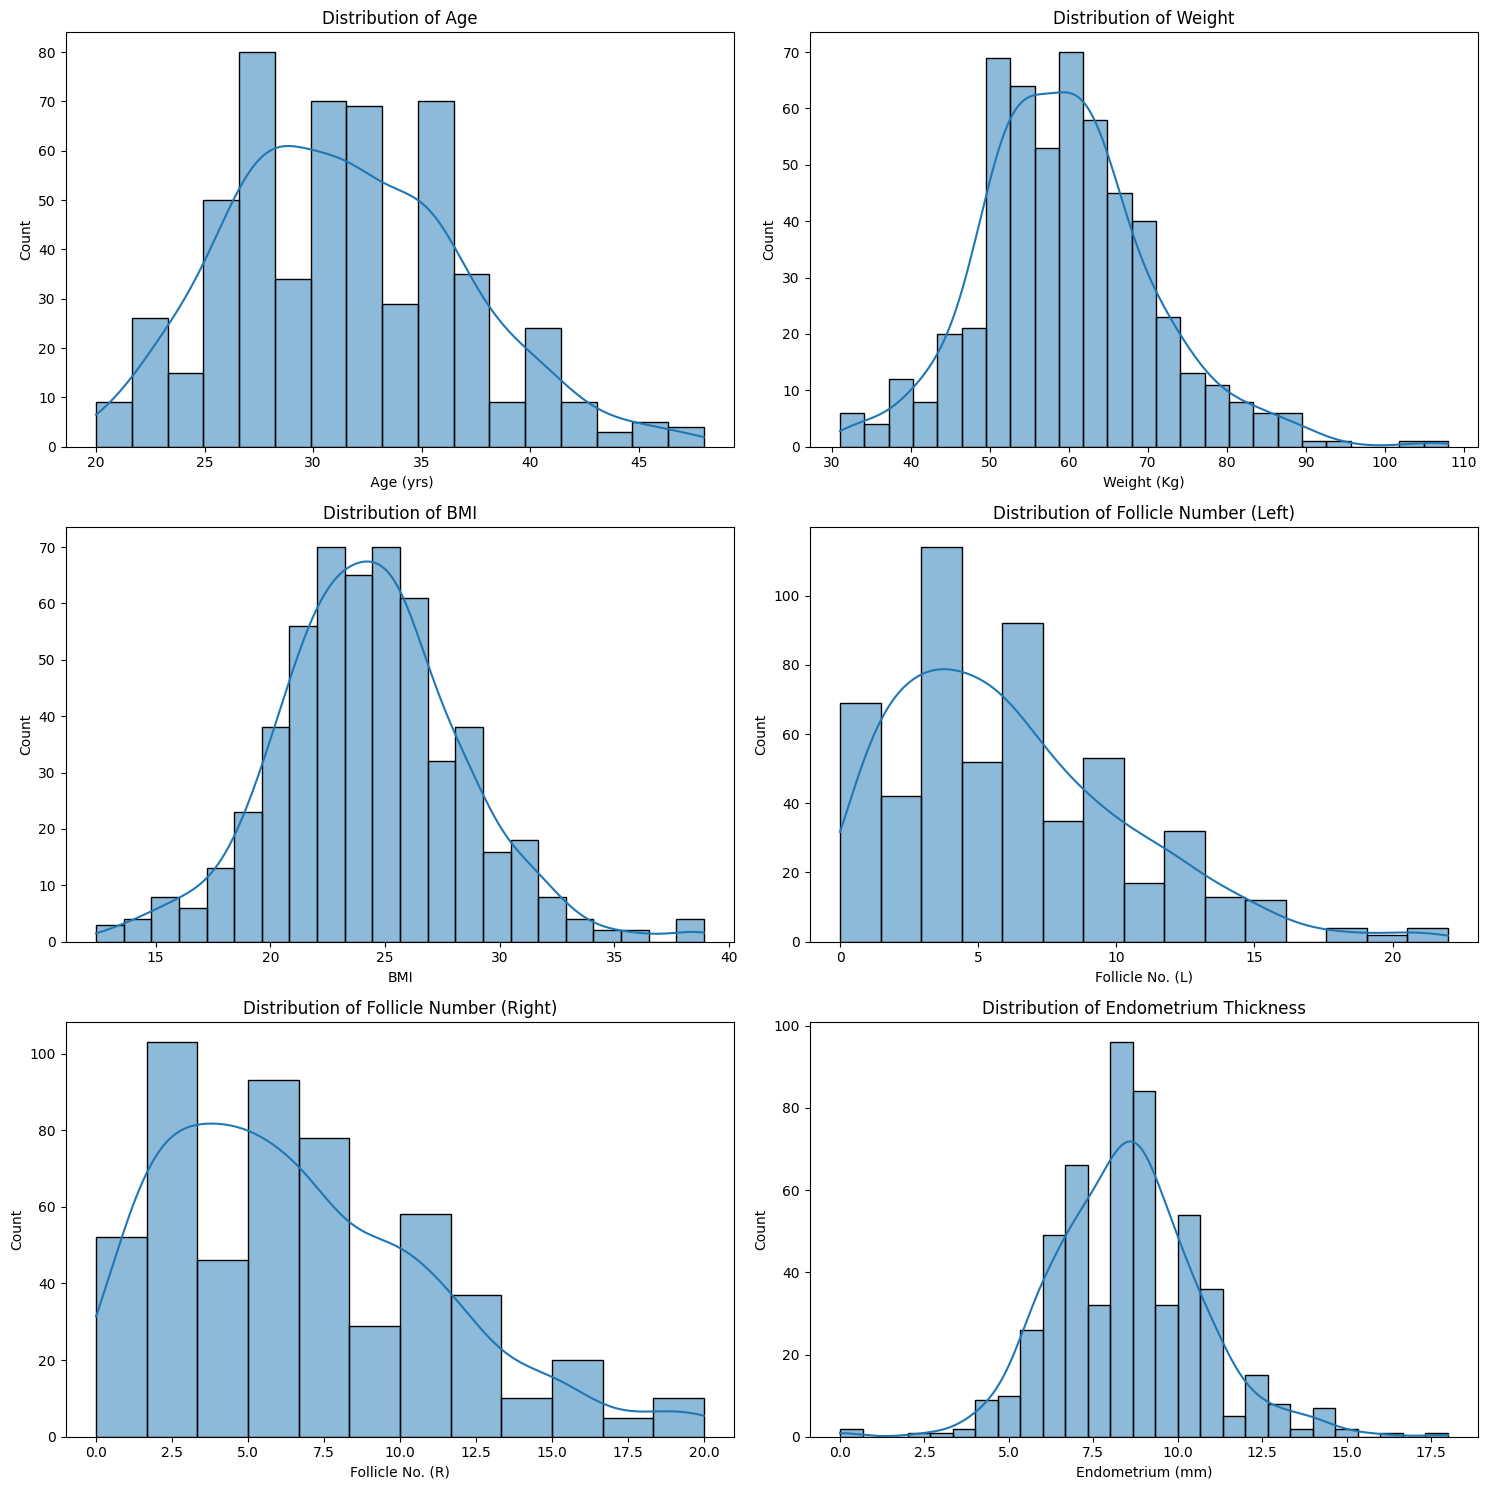

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot for Age
sns.histplot(data[' Age (yrs)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Plot for Weight
sns.histplot(data['Weight (Kg)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Weight')

# Plot for BMI
sns.histplot(data['BMI'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of BMI')

# Plot for Follicle No. (L)
sns.histplot(data['Follicle No. (L)'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Follicle Number (Left)')

# Plot for Follicle No. (R)
sns.histplot(data['Follicle No. (R)'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Follicle Number (Right)')

# Plot for Endometrium Thickness
sns.histplot(data['Endometrium (mm)'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Endometrium Thickness')

plt.tight_layout()
plt.show()

Step 1: Data Preprocessing


In [26]:
# Identify numeric and categorical columns based on dtype
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [27]:
# Remove the target variable from features
if 'PCOS (Y/N)' in numeric_features:
    numeric_features.remove('PCOS (Y/N)')

# Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [28]:
# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [29]:
# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])


In [30]:
# Prepare the features and target variable
X = data.drop('PCOS (Y/N)', axis=1)
y = data['PCOS (Y/N)']

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [33]:
# Checking for any non-numeric data in numeric columns
for col in numeric_features:
    if data[col].dtype == 'object':
        print(f"Non-numeric data found in {col}: ", data[col].unique())


# Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_preprocessed)
y_prob = model.predict_proba(X_test_preprocessed)[:, 1]  # probabilities for ROC AUC


# Model Evaluation

In [35]:
# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        77
           1       0.87      0.62      0.73        32

    accuracy                           0.86       109
   macro avg       0.87      0.79      0.82       109
weighted avg       0.86      0.86      0.85       109

Confusion Matrix:
 [[74  3]
 [12 20]]
ROC AUC Score: 0.9387175324675325
